EDA - Student Performance 02

In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import data

data = pd.read_csv('./data/student/student-mat.csv', sep=';')


In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
dataColumnsValues = data.columns.values; dataColumnsValues

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [8]:
#label
label = 'G3'

In [10]:
#Selectiong columns dtype int64

dataColumns_int64 = data.select_dtypes(include='int64'); dataColumns_int64


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [11]:
#selection names of columns with dtype int64

namesColInt64 = dataColumns_int64.columns.values; namesColInt64

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

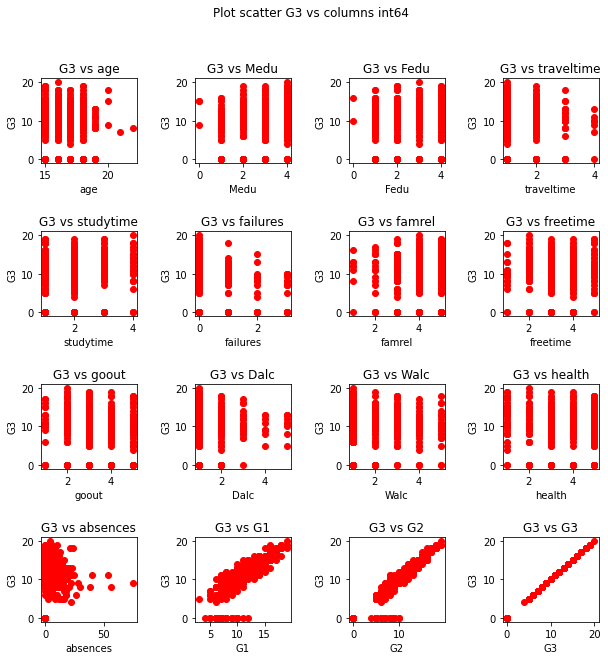

In [21]:
#Plotagens scatter column G3 vs columns dtype int64 

numPlots = len(dataColumns_int64.columns) # num columns dtype int64

fig, ax = plt.subplots(round(numPlots/4),round(numPlots/4), figsize=(10,10)) # subplots(4,4)
fig.subplots_adjust(wspace=0.6, hspace=0.8) # space with and height of plots
fig.suptitle('Plot scatter G3 vs columns int64')

n = 0 # control, contador index column 
for i in range(round(numPlots/4)):
    for j in range(round(numPlots/4)):
        col = namesColInt64[n]; n += 1
        ax[i][j].scatter(dataColumns_int64[col],dataColumns_int64[label], color='r') #label = G3
        ax[i][j].set_title(label + ' vs '+ col)
        ax[i][j].set_xlabel(col)
        ax[i][j].set_ylabel(label)
        
plt.show()


In [23]:
#selection columns dtype object

dataColumns_object = data.select_dtypes(include='object'); dataColumns_object

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [24]:
#selection names of columns dtype object
namesColObject = dataColumns_object.columns.values; namesColObject

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [37]:
# Example values and value_counts applying about columns school

print('Values column school: \n\n',data['school'].values); print(50*'-')
print('Value counts column school: \n\n',data['school'].value_counts())

Values column school: 

 ['GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' '

In [62]:
# print out columns dtype object with yours value_counts

for i in range(len(namesColObject)):
    col = namesColObject[i]
    print('value counts column '+col+': ')
    print(dataColumns_object[col].value_counts()); print(40*'-')
    

value counts column school: 
GP    349
MS     46
Name: school, dtype: int64
----------------------------------------
value counts column sex: 
F    208
M    187
Name: sex, dtype: int64
----------------------------------------
value counts column address: 
U    307
R     88
Name: address, dtype: int64
----------------------------------------
value counts column famsize: 
GT3    281
LE3    114
Name: famsize, dtype: int64
----------------------------------------
value counts column Pstatus: 
T    354
A     41
Name: Pstatus, dtype: int64
----------------------------------------
value counts column Mjob: 
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
----------------------------------------
value counts column Fjob: 
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
----------------------------------------
value counts column reason: 
course        145
home          109
reputati

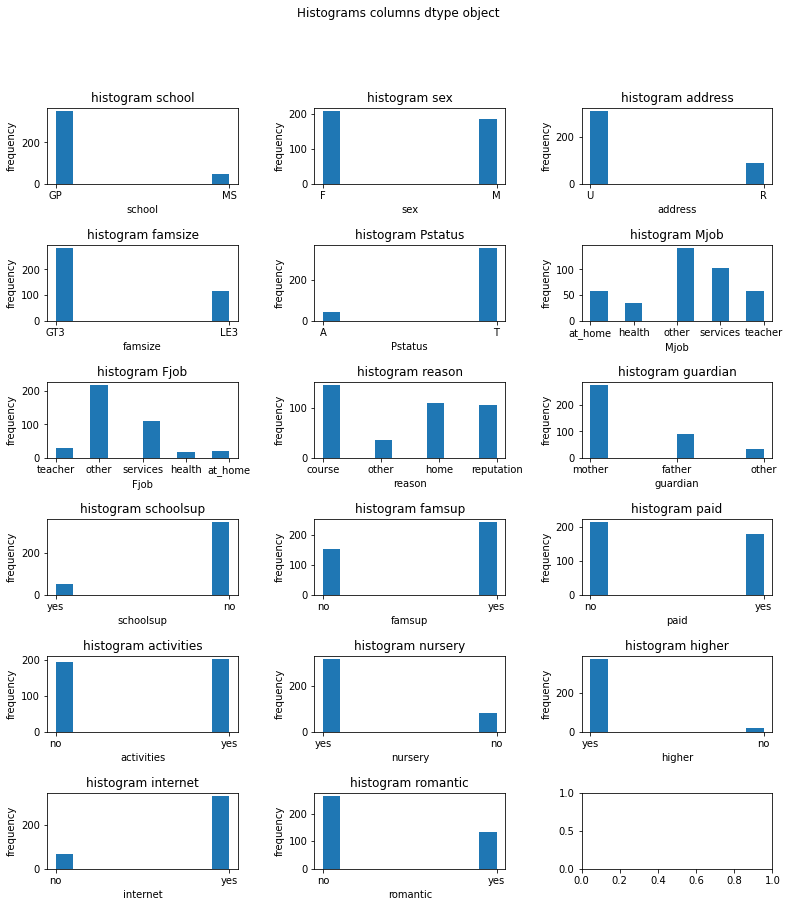

In [109]:

numColObject = len(namesColObject) # 17

fig, ax = plt.subplots(round(numColObject/3),round(numColObject/6), figsize=(13,14))
fig.subplots_adjust(hspace=0.8,wspace=0.4)
fig.suptitle('Histograms columns dtype object')

n = 0
for i in range(round(numColObject/3)):
    for j in range(round(numColObject/6)):
        col = namesColObject[n]; n +=1
        ax[i][j].hist(data[col])
        ax[i][j].set_title('histogram '+col)
        ax[i][j].set_xlabel(col)
        ax[i][j].set_ylabel('frequency')
        
        if(n==17):
            break
        
plt.show()



Fontes:

    [2]http://archive.ics.uci.edu/ml/datasets/Student+Performance#
    
    
    

Citations:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.